# In-Depth Analysis/Machine Learning

## Capstone Project 3: Predicting House prices in Seattle


-

In the **Pre-processing part** we already determine which features will be used to create the Model. We need to select a way to measure the reult and regression problems use certain evaluation metrics such as mean squared error (MSE).

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from termcolor import colored
from termcolor import colored as cl
import scipy.stats as stats
from scipy.stats import uniform, loguniform
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, \
    GridSearchCV, RandomizedSearchCV, KFold
from sklearn.decomposition import PCA

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/Users/pedrorodriguez/Desktop/Springboard/Capstone_3/Raw Data/apartment&house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3441 non-null   int64  
 1   Unnamed: 0.1               3441 non-null   int64  
 2   id                         3441 non-null   int64  
 3   latitude                   3441 non-null   float64
 4   longitude                  3441 non-null   float64
 5   zipcode                    3441 non-null   int64  
 6   property_type              3441 non-null   object 
 7   room_type                  3441 non-null   object 
 8   price                      3441 non-null   float64
 9   accommodates               3441 non-null   int64  
 10  cleaning_fee               3441 non-null   float64
 11  availability_30            3441 non-null   int64  
 12  bathrooms                  3441 non-null   float64
 13  bedrooms                   3441 non-null   float

In [3]:
df = df.drop(columns= ['Unnamed: 0', 'Unnamed: 0.1', 'room_type'])
df.head()

,id,latitude,longitude,zipcode,property_type,price,accommodates,cleaning_fee,availability_30,bathrooms,bedrooms,review_scores_rating,review_scores_cleanliness,distance,cleaning_fee_class
0,241032,47.636289,-122.371025,98119,Apartment,85.0,4,0.0,14,1.0,1.0,95.0,10.0,0.000000,0
1,953595,47.639123,-122.365666,98119,Apartment,150.0,4,40.0,13,1.0,1.0,96.0,10.0,4.807703,1
2,3308979,47.629724,-122.369483,98119,House,975.0,11,300.0,1,4.5,5.0,97.0,10.0,4.359157,1
3,7421966,47.638473,-122.369279,98119,Apartment,100.0,3,0.0,0,1.0,0.0,0.0,0.0,4.495038,0
4,278830,47.632918,-122.372471,98119,House,450.0,6,125.0,30,2.0,3.0,92.0,9.0,4.691575,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3441 non-null   int64  
 1   latitude                   3441 non-null   float64
 2   longitude                  3441 non-null   float64
 3   zipcode                    3441 non-null   int64  
 4   property_type              3441 non-null   object 
 5   price                      3441 non-null   float64
 6   accommodates               3441 non-null   int64  
 7   cleaning_fee               3441 non-null   float64
 8   availability_30            3441 non-null   int64  
 9   bathrooms                  3441 non-null   float64
 10  bedrooms                   3441 non-null   float64
 11  review_scores_rating       3441 non-null   float64
 12  review_scores_cleanliness  3441 non-null   float64
 13  distance                   3441 non-null   float

In [5]:
df = pd.get_dummies(df, columns= ['zipcode', 'property_type'])

### Split to train and test data

Let scale the data with Standard Scale to better model performance. Before the split, the data by train and test sets. 

In [6]:
df.columns

Index(['id', 'latitude', 'longitude', 'price', 'accommodates', 'cleaning_fee',
       'availability_30', 'bathrooms', 'bedrooms', 'review_scores_rating',
       'review_scores_cleanliness', 'distance', 'cleaning_fee_class',
       'zipcode_0', 'zipcode_98101', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98104', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98121', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98134', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98177', 'zipcode_98178', 'zipcode_98199',
       'property_type_Apartment', 'property_type_House'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

X = df[['accommodates', 'cleaning_fee',
       'availability_30', 'bathrooms', 'bedrooms', 'review_scores_rating',
       'review_scores_cleanliness', 'distance', 'cleaning_fee_class',
       'zipcode_0', 'zipcode_98101', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98104', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98121', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98134', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98177', 'zipcode_98178', 'zipcode_98199',
       'property_type_Apartment', 'property_type_House']]
y = df['price']

In [9]:
columns = X.columns
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns= columns)
X_scaled.head()

,accommodates,cleaning_fee,availability_30,bathrooms,bedrooms,review_scores_rating,review_scores_cleanliness,distance,cleaning_fee_class,zipcode_0,...,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,property_type_Apartment,property_type_House
0,0.312765,-0.908448,-0.219693,-0.432916,-0.357990,0.447528,0.557716,-1.818832,-1.661522,-0.038147,...,-0.109813,-0.01705,-0.11116,-0.229381,-0.034115,-0.072516,-0.038147,-0.127449,1.007292,-1.007292
1,0.312765,-0.114526,-0.301863,-0.432916,-0.357990,0.475920,0.557716,0.326206,0.601858,-0.038147,...,-0.109813,-0.01705,-0.11116,-0.229381,-0.034115,-0.072516,-0.038147,-0.127449,1.007292,-1.007292
2,3.826562,5.045969,-1.287905,5.788835,4.093120,0.504313,0.557716,0.126080,0.601858,-0.038147,...,-0.109813,-0.01705,-0.11116,-0.229381,-0.034115,-0.072516,-0.038147,-0.127449,-0.992761,0.992761
3,-0.189206,-0.908448,-1.370075,-0.432916,-1.470768,-2.249745,-2.221979,0.186705,-1.661522,-0.038147,...,-0.109813,-0.01705,-0.11116,-0.229381,-0.034115,-0.072516,-0.038147,-0.127449,1.007292,-1.007292
4,1.316707,1.572559,1.095028,1.344727,1.867565,0.362351,0.279747,0.274393,0.601858,-0.038147,...,-0.109813,-0.01705,-0.11116,-0.229381,-0.034115,-0.072516,-0.038147,-0.127449,-0.992761,0.992761


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)

In [11]:
def calculate_residual_percentile(pred, actual, percentile):
    """Calculate percentile bounds of positive and negative residuals"""
    import numpy as np
    resid = actual - pred
    
    #Create Positive and Negative Condition Arrays
    condition_pos = resid > 0
    condition_neg = resid < 0
    
    #Create arrays for positive and negative residuals
    pos_residuals = np.extract(condition_pos, resid)
    neg_residuals = np.extract(condition_neg, resid)
    
    #Calculate Percentile
    pos_percentile = np.percentile(pos_residuals, percentile)
    neg_percentile = np.percentile(neg_residuals, 100-percentile)
    pos_percentile = round(pos_percentile,4)
    neg_percentile = round(neg_percentile,4)
    return neg_percentile, pos_percentile
 

# Modeling

The data was split into train, validation, and test sets, as I plan to use the validation set for hyperparameter tuning. 

First I will run a linear regression, random forest, and gradient boosting model with the defaults and no tuning to get some baseline scores.

#### Evaluate performance based on the following metrics:

- Mean Absolute Error (MAE): represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

- Root Mean Squared Error (RMSE): is the error rate by the square root of MSE.

- R-squared (Coefficient of determination): The coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.



**Linear regression** algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable

**Random Forest** can be used as both classification and random forest regression algorithm. The RF algorithm is an algorithm for machine learning, which is a forest. We know the forest consists of a number of trees. Creates a random sample of multiple decision trees and merges them together to obtain a more stable and accurate prediction through cross validation. The more trees in the forest, the more robust would be the prediction and thus higher accuracy.

## Linear Regression

Regression analysis is one of the most important fields in statistics and machine learning. There are many regression methods available. Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [13]:
lr_predictions = lr.predict(X_test)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
lr_mae = np.mean(abs(lr_predictions - y_test))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

print('Base Linear Regression Train Score:      ', lr_train_score)
print('Base Linear Regression Test Score:       ', lr_test_score)
print('Base Linear Regression MAE:              ',lr_mae)
print('Base Linear Regression RMSE:             ',lr_rmse)

Base Linear Regression Train Score:       0.5597765815868412
Base Linear Regression Test Score:        0.6330403144257339
Base Linear Regression MAE:               34.38291714245291
Base Linear Regression RMSE:              48.80978162418894


The Linear Regression has a Test score of 0.64. This score is weak but is still capable of solving a real problem.

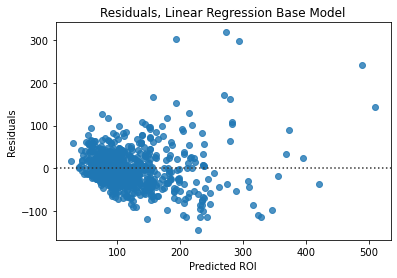

In [14]:
sns.residplot(x = lr_predictions, y = y_test - lr_predictions)
plt.title('Residuals, Linear Regression Base Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

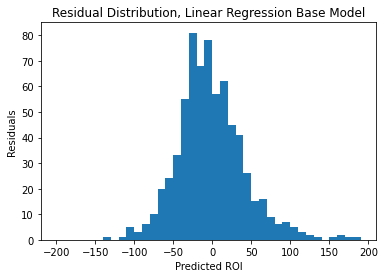

In [15]:
plt.hist(y_test - lr_predictions, bins = np.arange(-200, 200, 10))
plt.title('Residual Distribution, Linear Regression Base Model', size= 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

In [16]:
lr_90_percentile = calculate_residual_percentile(lr_predictions, y_test ,90)
print('Base Linear Regression Residuals, 90th percentile: ', lr_90_percentile)

Base Linear Regression Residuals, 90th percentile:  (-63.071, 81.0572)


The residuals are centered bellow zero and have a long tail towards the positive side.

## Random Forest

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique.

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs = -1, n_estimators = 100, random_state = 46, oob_score = True)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=46)

In [18]:
rf_prediction = rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
rf_mae = np.mean(abs(rf_prediction - y_test))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_prediction))

In [19]:
print('Base Random Forest Train Score:      ', rf_train_score)
print('Base Random Forest Test Score:       ', rf_test_score)
print('Base Random Forest MAE:              ', rf_mae)
print('Base Random Forest RMSE:             ', rf_rmse)

Base Random Forest Train Score:       0.9358051616776282
Base Random Forest Test Score:        0.6411992311423615
Base Random Forest MAE:               31.971973875181426
Base Random Forest RMSE:              48.26411750121681


The random forest model has a Test score of 0.61. This score is weak meaning we need to look how to improve the score.

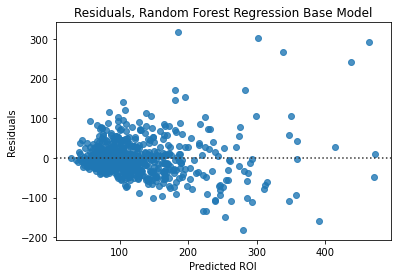

In [20]:
sns.residplot(x = rf_prediction, y = y_test - rf_prediction)
plt.title('Residuals, Random Forest Regression Base Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

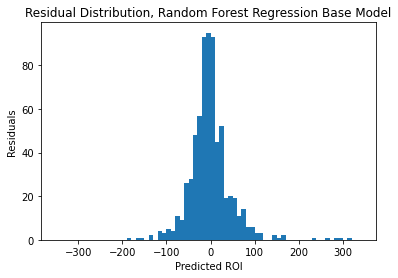

In [21]:
plt.hist(y_test - rf_prediction, bins = np.arange(-350, 350, 10))
plt.title('Residual Distribution, Random Forest Regression Base Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

In [22]:
rf_90_percentile = calculate_residual_percentile(rf_prediction, y_test ,90)
print('Base Random Forest Residuals, 90th percentile: ', rf_90_percentile)

Base Random Forest Residuals, 90th percentile:  (-60.796, 78.32)


The residuals are centered just below zero, indicating prices with where the model over-estimating the low ROI. 90 Percent of the residuals are between 0.73 and 0.88 ROI.

## Gradient Boosting

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

The algorithm provides hyperparameters that should be tuned for a specific dataset.

- The number of trees or estimators in the model.
- The learning rate of the model.
- The row and column sampling rate for stochastic models.
- The maximum tree depth.
- The minimum tree weight.
- The regularization terms alpha and lambda.



In [23]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(random_state = 46)
boost.fit(X_train, y_train)

GradientBoostingRegressor(random_state=46)

In [24]:
boost_predictions = boost.predict(X_test)
boost_train_score = boost.score(X_train, y_train)
boost_test_score = boost.score(X_test, y_test)
boost_mae = np.mean(abs(boost_predictions - y_test))
boost_rmse = np.sqrt(mean_squared_error(y_test, boost_predictions))

print('Base Gradient Boost Train Score:     ', boost_train_score)
print('Base Gradient Boost Test Score:      ', boost_test_score)
print('Base Gradient Boost MAE:             ', boost_mae)
print('Base Gradient Boost RSME:            ',boost_rmse)

Base Gradient Boost Train Score:      0.7110673441099895
Base Gradient Boost Test Score:       0.6615073891353469
Base Gradient Boost MAE:              31.689037778010125
Base Gradient Boost RSME:             46.878346357206375


The Gradient Boosting has a much better test score of 0.66 compared to the Lineal Rigression which scored 0.60.

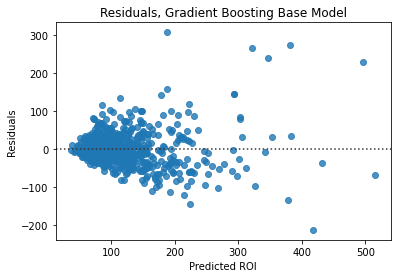

In [25]:
sns.residplot(x = boost_predictions, y = y_test - boost_predictions)
plt.title('Residuals, Gradient Boosting Base Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

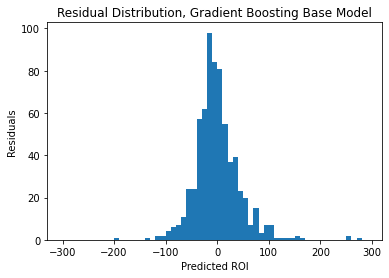

In [26]:
plt.hist(y_test - boost_predictions, bins = np.arange(-300, 300, 10))
plt.title('Residual Distribution, Gradient Boosting Base Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

In [27]:
rf_90_percentile = calculate_residual_percentile(boost_predictions, y_test ,90)
print('Base Random Forest Residuals, 90th percentile: ', rf_90_percentile)

Base Random Forest Residuals, 90th percentile:  (-56.4659, 77.598)


The residuals are centered bellow zero and have a long tail towards the positive side.

## Extreme Gradient Boosting

Unlike Gradient Boost, XGBoost makes use of regularization parameters that helps against overfitting.

In [28]:
from xgboost import XGBRegressor

In [29]:
xgb  = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
xgb_predictions = xgb.predict(X_test)
xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)
xgb_mae = np.mean(abs(xgb_predictions - y_test))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

In [31]:
print('Base XGB Train Score:     ', xgb_train_score)
print('Base XGB Test Score:      ', xgb_test_score)
print('Base XGB MAE:             ', xgb_mae)
print('Base XGB RSME:            ', xgb_rmse)

Base XGB Train Score:      0.9720180289086214
Base XGB Test Score:       0.5819693646358405
Base XGB MAE:              34.0866118709304
Base XGB RSME:             52.0956837198396


# Base Model Summary

In [32]:
print('Base Linear Regression:')
print('Base Linear Regression Train Score:  ', lr_train_score)
print('Base Linear Regression Test Score:   ', lr_test_score)
print('Base Linear Regression MAE:          ',lr_mae)
print('Base Linear Regression RMSE:         ',lr_rmse)
print('-'*71)
print('Base Random Forest: ')
print('Base Random Forest Train Score:      ', rf_train_score)
print('Base Random Forest Test Score:       ', rf_test_score)
print('Base Random Forest MAE:              ', rf_mae)
print('Base Random Forest RMSE:             ', rf_rmse)
print('-'*71)
print('Base Gradient Boost:')
print('Base Gradient Boost Train Score:     ', boost_train_score)
print('Base Gradient Boost Test Score:      ', boost_test_score)
print('Base Gradient Boost MAE:             ', boost_mae)
print('Base Gradient Boost RMSE:            ',boost_rmse)
print('-'*71)
print('Base Extreme Gradient Boost:')
print('Base XGB Train Score:                ', xgb_train_score)
print('Base XGB Test Score:                 ', xgb_test_score)
print('Base XGB MAE:                        ', xgb_mae)
print('Base XGB RMSE:                       ', xgb_rmse)

Base Linear Regression:
Base Linear Regression Train Score:   0.5597765815868412
Base Linear Regression Test Score:    0.6330403144257339
Base Linear Regression MAE:           34.38291714245291
Base Linear Regression RMSE:          48.80978162418894
-----------------------------------------------------------------------
Base Random Forest: 
Base Random Forest Train Score:       0.9358051616776282
Base Random Forest Test Score:        0.6411992311423615
Base Random Forest MAE:               31.971973875181426
Base Random Forest RMSE:              48.26411750121681
-----------------------------------------------------------------------
Base Gradient Boost:
Base Gradient Boost Train Score:      0.7110673441099895
Base Gradient Boost Test Score:       0.6615073891353469
Base Gradient Boost MAE:              31.689037778010125
Base Gradient Boost RMSE:             46.878346357206375
-----------------------------------------------------------------------
Base Extreme Gradient Boost:
Base XGB

The best model performing is the Linear Regression model have the lowest MAE(36%), RMSE(57%) and the highest test score with 66.8%. 

# Model Tuning

Tuning is the process of maximizing a model's performance without overfitting or creating too high of a variance. This is accomplished by selecting appropriate “hyperparameters.”
I will try to increase the score of every model and at the end select the best prediction score.

In [33]:
kfolds = KFold(n_splits=10, shuffle=True)

## Linear Regression Tuning

I will attempt to fit a ridge and lasso model to see if the results are improved. Based on the low score on the training set, it most likely underfitting.

In [34]:
from sklearn.linear_model import Ridge

alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alphas:
    
    ridge = Ridge(alpha = alpha, fit_intercept = True, random_state = 0)
    ridge.fit(X_train, y_train)
    train_error = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))
    test_error = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
    print('alpha: {:7} | train error: {:5} | val error: {:6}'.
          format(alpha,
                 round(train_error,10),
                 round(test_error,10)))

alpha:   1e-06 | train error: 60.5839413236 | val error: 48.8097816157
alpha:   1e-05 | train error: 60.5839413236 | val error: 48.8097815393
alpha:  0.0001 | train error: 60.5839413236 | val error: 48.8097807752
alpha:   0.001 | train error: 60.5839413259 | val error: 48.8097731366
alpha:    0.01 | train error: 60.5839415487 | val error: 48.8096970006
alpha:     0.1 | train error: 60.5839623534 | val error: 48.8089590506
alpha:       1 | train error: 60.5853569036 | val error: 48.8031218881
alpha:      10 | train error: 60.6345390805 | val error: 48.7957577499
alpha:     100 | train error: 61.1628146967 | val error: 49.0868751738


In [35]:
ridge = Ridge(alpha = .000001)
ridge.fit(X_train, y_train)

Ridge(alpha=1e-06)

In [36]:
from sklearn.linear_model import Lasso

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

for alpha in alphas:
    
    lasso = Lasso(alpha = alpha, fit_intercept = True, random_state = 1)
    lasso.fit(X_train, y_train)
    new_train_error = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))
    new_validation_error = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
    print('alpha: {:7} | train error: {:5} | val error: {:6}'.
          format(alpha,
                 round(new_train_error,10),
                 round(new_validation_error,10)))

alpha:   1e-05 | train error: 60.5839413288 | val error: 48.8097805837
alpha:  0.0001 | train error: 60.5839418421 | val error: 48.8097715773
alpha:   0.001 | train error: 60.5839916121 | val error: 48.8090064411
alpha:    0.01 | train error: 60.5873335828 | val error: 48.8066968594
alpha:     0.1 | train error: 60.6949078291 | val error: 48.8747949265
alpha:       1 | train error: 62.1852051684 | val error: 49.9778982099
alpha:      10 | train error: 65.5889052252 | val error: 52.7519023206
/Users/pedrorodriguez/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324237.3423720272, tolerance: 2294.512004069767
  model = cd_fast.enet_coordinate_descent(
/Users/pedrorodriguez/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increa

In [37]:
lasso = Lasso(alpha = .001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [38]:
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)


print('Base Linear Regression Train Score:      ', lr.score(X_train, y_train))
print('Base Linear Regression Test Score:       ', lr.score(X_test, y_test))
print('-'*72)
print('Ridge Regression Train Score:            ', ridge.score(X_train, y_train))
print('Ridge Regression Test Score:             ', ridge.score(X_test, y_test))
print('-'*72)
print('Lasso Regression Train Score:            ', lasso_train_score)
print('Lasso Regression Test Score:             ', lasso_test_score)

Base Linear Regression Train Score:       0.5597765815868412
Base Linear Regression Test Score:        0.6330403144257339
------------------------------------------------------------------------
Ridge Regression Train Score:             0.5597765815868412
Ridge Regression Test Score:              0.6330403145533978
------------------------------------------------------------------------
Lasso Regression Train Score:             0.559775850759977
Lasso Regression Test Score:              0.6330519702317443


The lasso regularization is with an alpha value of 0.001 is performing the best on the Test data, however, the change is minimal. The Linear regression only has a very slight improvement.

In [39]:
lasso_predictions = lasso.predict(X_test)
lasso_mae = np.mean(abs(lasso_predictions - y_test))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

print('Base Linear Regression MAE:   ',lr_mae)
print('Base Linear Regression RMSE:  ',lr_rmse)
print('Lasso Regresson MAE:          ',lasso_mae)
print('Lasso Regression RSME:        ', lasso_rmse)


Base Linear Regression MAE:    34.38291714245291
Base Linear Regression RMSE:   48.80978162418894
Lasso Regresson MAE:           34.38209357863297
Lasso Regression RSME:         48.80900644112918


The Lasso model also shows a minimal improvement on the MAE and RMSE metrics.

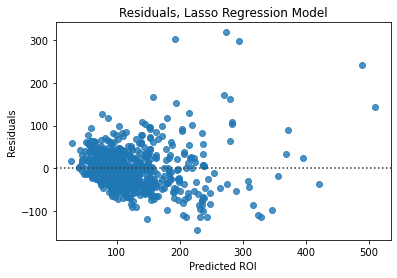

In [40]:
sns.residplot(x = lasso_predictions, y = y_test - lasso_predictions)
plt.title('Residuals, Lasso Regression Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

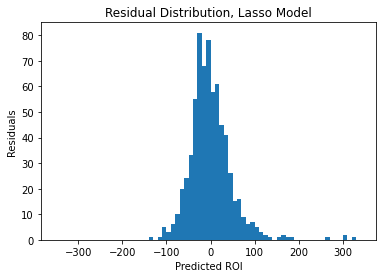

In [41]:
plt.hist(y_test - lasso_predictions, bins = np.arange(-350, 350, 10))
plt.title('Residual Distribution, Lasso Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

In [42]:
lasso_90_percentile = calculate_residual_percentile(lasso_predictions, y_test ,90)
print('Lasso Residuals, 90th percentile: ', lasso_90_percentile)

Lasso Residuals, 90th percentile:  (-63.033, 81.0523)


As with the base model, the residuals are still centered above zero, and the negative residuals have a heavy tail. 

## Random Forest Tuning

To tune the Random Forest, I have to evaluate each feature's importance for the Random Forest model.

In [43]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = ['accommodates', 'cleaning_fee',
       'availability_30', 'bathrooms', 'bedrooms', 'review_scores_rating',
       'review_scores_cleanliness', 'distance', 'cleaning_fee_class',
       'zipcode_0', 'zipcode_98101', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98104', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98121', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98134', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98177', 'zipcode_98178', 'zipcode_98199',
       'property_type_Apartment', 'property_type_House'], columns = ['importance']).sort_values('importance', ascending = False)
print(feature_importances.head(40))

                           importance
bedrooms                     0.404803
distance                     0.115465
cleaning_fee                 0.108980
bathrooms                    0.086006
accommodates                 0.057289
availability_30              0.046924
review_scores_rating         0.039670
review_scores_cleanliness    0.015095
cleaning_fee_class           0.013874
zipcode_98119                0.012427
zipcode_98109                0.010324
property_type_Apartment      0.009188
zipcode_98115                0.008892
zipcode_98121                0.008860
property_type_House          0.007630
zipcode_98112                0.007426
zipcode_98199                0.006772
zipcode_98122                0.005828
zipcode_98105                0.003832
zipcode_98107                0.003651
zipcode_98102                0.003536
zipcode_98103                0.003190
zipcode_98117                0.002834
zipcode_98116                0.002784
zipcode_98101                0.002756
zipcode_9811

In [44]:
X_2 = X_scaled[['accommodates', 'cleaning_fee',
       'availability_30', 'bathrooms', 'bedrooms', 'review_scores_rating',
       'review_scores_cleanliness', 'distance', 'cleaning_fee_class',
       'zipcode_98101', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98104', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98121', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98177', 'zipcode_98199',
       'property_type_Apartment', 'property_type_House']]
y_2 = y

In [45]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.25, random_state = 46)

Cutting the bathroom feature makes the Random Forest decrease the scoring metrics to 63%.

In [46]:
rf_3 = RandomForestRegressor(random_state= 46)

n_estimators= [100, 1000,]
max_features= [ 'sqrt', 'log2']
max_depth= [20,30,40]
max_depth.append(None)
min_samples_split= [5, 10, 15,]
min_samples_leaf= [1, 2, 5]

In [47]:
grid_param =  { 'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf    }

In [48]:
rfr= RandomForestRegressor(random_state= 46)
rfr_random = RandomizedSearchCV(estimator= rfr,
                                param_distributions= grid_param,
                                cv= 5,
                                random_state= 46,
                                n_jobs= -1)

In [49]:
rfr_random.fit(X_2_train, y_2_train)
print(rfr_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


In [50]:
rf_2 = RandomForestRegressor(n_jobs = -1, n_estimators = 100, min_samples_split= 5, max_features= 'sqrt', min_samples_leaf= 1, max_depth= 30, random_state = 46)

rf_2.fit(X_2_train, y_2_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_jobs=-1, random_state=46)

In [51]:
rf_2_predictions = rf_2.predict(X_2_test)
rf_2_train_score = rf_2.score(X_2_train, y_2_train)
rf_2_test_score = rf_2.score(X_2_test, y_2_test)
rf_2_mae = np.mean(abs(rf_2_predictions - y_2_test))
rf_2_rmse = np.sqrt(mean_squared_error(y_2_test, rf_2_predictions))

print('Base Random Forest:')
print(' Train Score:      ', rf_train_score)
print(' Test Score:       ', rf_test_score)
print(' MAE:              ', rf_mae)
print(' RMSE:             ', rf_rmse)
print('Reduced Dimension Random Forest:')
print(' Train Score:      ', rf_2_train_score)
print(' Test Score:       ', rf_2_test_score)
print(' MAE:              ',rf_2_mae)
print(' RMSE:             ',rf_2_rmse)

Base Random Forest:
 Train Score:       0.9358051616776282
 Test Score:        0.6411992311423615
 MAE:               31.971973875181426
 RMSE:              48.26411750121681
Reduced Dimension Random Forest:
 Train Score:       0.850643966786256
 Test Score:        0.6443078990190512
 MAE:               31.64459741594636
 RMSE:              47.228315767633276


#### Gradient Boost Tuning

To tune the gradient boost model, I will set up a parameter grid and do a grid search to determine which parameters yield the highest score on the validation set. Next, search over the max_depth, learning_rate, min_samples_leaf, and max_features hyperparameters, all with an increased n_estimators parameter of 1000.

In [52]:
from sklearn.model_selection import ParameterGrid

param_grid = {'learning_rate' : [0.1, 0.01, 0.02, 0.05, 0.005], #default 0.1
              'min_samples_leaf' : [1,2,3,4], #default 1
              'max_features' : [1, 0.5, 0.05, 0.005]} #default none (all)

boost_2 = GradientBoostingRegressor(n_estimators = 100, random_state = 46)

In [53]:
scores = []
best_score = 0
best_param = {}

for p in ParameterGrid(param_grid):
    boost_2.set_params(**p)
    boost_2.fit(X_train, y_train)
    score = boost_2.score(X_test, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_param = p

In [54]:
print(best_param)
print(best_score)

{'learning_rate': 0.1, 'max_features': 0.5, 'min_samples_leaf': 3}
0.6814189754213884


The best scoring was found with a learning rate of 0.1, max features of 0.5, and minimum samples leaf of 3.

In [55]:
boost_2 = GradientBoostingRegressor(learning_rate = 0.1,
                                        max_features = 0.5,
                                        min_samples_leaf = 3,
                                        random_state = 46)
boost_2.fit(X_train, y_train)

GradientBoostingRegressor(max_features=0.5, min_samples_leaf=3, random_state=46)

In [56]:
boost_2_predictions = boost_2.predict(X_test)
boost_2_train_score = boost_2.score(X_train, y_train)
boost_2_test_score = boost_2.score(X_test, y_test)
boost_2_mae = np.mean(abs(boost_2_predictions - y_test))
boost_2_rmse = np.sqrt(mean_squared_error(y_test, boost_2_predictions))
print('Base Gradient Boost:')
print(' Train Score:      ', boost_train_score)
print(' Test Score:       ', boost_test_score)
print(' MAE:              ', boost_mae)
print(' RSME:             ', boost_rmse)
print('-'*72)
print('Tuned Gradient Boost:')
print(' Train Score:      ', boost_2_train_score)
print(' Test Score:       ', boost_2_test_score)
print(' MAE:              ', boost_2_mae)
print(' RSME:             ', boost_2_rmse)

Base Gradient Boost:
 Train Score:       0.7110673441099895
 Test Score:        0.6615073891353469
 MAE:               31.689037778010125
 RSME:              46.878346357206375
------------------------------------------------------------------------
Tuned Gradient Boost:
 Train Score:       0.6963980792836932
 Test Score:        0.6814189754213884
 MAE:               31.000910765841194
 RSME:              45.47865784838749


The Tuned Gradient Boost results in a minimal gain in the scoring metrics to 67%.

#### XGBRegression tuning

I will tune the XGBRegressor hyperparameter using Randomized Search CV and GridSearchCV to find the optimal parameters. 

In [57]:
import xgboost as xgb

In [58]:
gs = make_pipeline(RobustScaler(),
                   GridSearchCV(ElasticNet(max_iter=100000),
                                param_grid={'l1_ratio': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
                                            'alpha': np.logspace(-4, -2, 9),
                                           },
                                scoring='neg_root_mean_squared_error',
                                refit=True,
                                cv=kfolds,
                                n_jobs=-1,
                                verbose=1
                               ))


In [59]:
gs.fit(X_train, y_train)
print('best params', gs._final_estimator.best_params_)
print('best score', -gs._final_estimator.best_score_)
l1_ratio = gs._final_estimator.best_params_['l1_ratio']
alpha = gs._final_estimator.best_params_['alpha']

Fitting 10 folds for each of 117 candidates, totalling 1170 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   24.2s
best params {'alpha': 0.01, 'l1_ratio': 0.6}
best score 60.221281888550685
[Parallel(n_jobs=-1)]: Done 1155 out of 1170 | elapsed:   29.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 1170 out of 1170 | elapsed:   29.7s finished


In [60]:
### XGBoost (GridSearchCV)

MEAN_RESPONSE=y_train.mean()
def cv_to_raw(cv_val, mean_response=MEAN_RESPONSE):
    """convert log1p rmse to underlying SalePrice error"""
    return np.expm1(mean_response+cv_val) - np.expm1(mean_response)
    
    
gs = make_pipeline(RobustScaler(),
                   GridSearchCV(ElasticNet(max_iter=100000),
                                param_grid={'l1_ratio': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
                                            'alpha': np.logspace(-4, -2, 9),
                                           },
                                scoring='neg_root_mean_squared_error',
                                refit=True,
                                cv=kfolds,
                                n_jobs=-1,
                                verbose=1
                               ))

gs.fit(X_2_train, y_2_train)
print('best params', gs._final_estimator.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 10 folds for each of 117 candidates, totalling 1170 fits
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:   18.2s
best params {'alpha': 0.01, 'l1_ratio': 0.01}
[Parallel(n_jobs=-1)]: Done 1170 out of 1170 | elapsed:   19.4s finished


In [61]:
# RandomizedSearch
rs = make_pipeline(RobustScaler(),
                   RandomizedSearchCV(ElasticNet(max_iter=100000),
                                      {'alpha': loguniform(0.0001, 0.1),
                                       'l1_ratio': uniform(0.001, 0.5),
                                      },
                                      scoring='neg_root_mean_squared_error',
                                      refit=True,
                                      cv=kfolds,
                                      n_iter=200,
                                      n_jobs=-1,
                                      verbose=1,
                                     )
                  )

rs.fit(X_2_train, y_2_train)

print('best params', rs._final_estimator.best_params_)
print('best score', -rs._final_estimator.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:   19.0s
best params {'alpha': 0.04923378452556462, 'l1_ratio': 0.4783506324145333}
best score 60.57492946252431
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   23.5s finished


**Let's compare the parameters results**

In [62]:
boost_4 = XGBRegressor(n_estimators = 1000, alpha= 0.05, learning_rate=0.005)
boost_4.fit(X_2_train, y_2_train)
boost_5 = XGBRegressor(n_estimators = 1000, alpha= 0.004, learning_rate=0.5)
boost_5.fit(X_2_train, y_2_train)

XGBRegressor(alpha=0.004, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0.00400000019, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [63]:
boost_4_predictions = boost_4.predict(X_2_test)
boost_4_train_score = boost_4.score(X_2_train, y_2_train)
boost_4_test_score = boost_4.score(X_2_test, y_2_test)
boost_4_mae = np.mean(abs(boost_4_predictions - y_2_test))
boost_4_rmse = np.sqrt(mean_squared_error(y_2_test, boost_4_predictions))


boost_5_predictions = boost_5.predict(X_2_test)
boost_5_train_score = boost_5.score(X_2_train, y_2_train)
boost_5_test_score = boost_5.score(X_2_test, y_2_test)
boost_5_mae = np.mean(abs(boost_5_predictions - y_2_test))
boost_5_rmse = np.sqrt(mean_squared_error(y_2_test, boost_5_predictions))

print('Base Gradient Boost:')
print(' Train Score:      ', boost_train_score)
print(' Test Score:       ', boost_test_score)
print(' MAE:              ', boost_mae)
print(' RMSE:             ', boost_rmse)
print('-'*72)
print('Tune Gradient Boost-1:')
print(' Train Score:      ', boost_5_train_score)
print(' Test Score:       ', boost_5_test_score)
print(' MAE:              ', boost_5_mae)
print(' RMSE:             ', boost_5_rmse)
print('-'*72)
print('Tune Gradient Boost-2:')
print(' Train Score:      ', boost_4_train_score)
print(' Test Score:       ', boost_4_test_score)
print(' MAE:              ', boost_4_mae)
print(' RMSE:             ', boost_4_rmse)

Base Gradient Boost:
 Train Score:       0.7110673441099895
 Test Score:        0.6615073891353469
 MAE:               31.689037778010125
 RMSE:              46.878346357206375
------------------------------------------------------------------------
Tune Gradient Boost-1:
 Train Score:       0.9999999985906844
 Test Score:        0.4588552178254568
 MAE:               38.698271711528925
 RMSE:              58.25350827177486
------------------------------------------------------------------------
Tune Gradient Boost-2:
 Train Score:       0.8507971026136392
 Test Score:        0.6054496328508515
 MAE:               32.9596567940352
 RMSE:              49.74123613211122


I was tuning the XBGRegression and the score decrease compared to the baseline.

## Model Selection

After produced many iterations of performance tuning to find the optimal solution of each model. Random Forest Regression, XGBoost, Gradient Boost Regression, and XGBoost were tuned by function GridSearchCV provided by scikit-learn to produce the following results listed.

In [64]:
print('      Models                  Test score')
print('Lasso Regression Test Score:  ', round(lasso_test_score, 4))
print('Random Forest Test Score:     ', round(rf_2_test_score, 4)) 
print('Gradient Boost:               ', round(boost_2_test_score,4))
print('XGBoot regression:            ', round(boost_4_test_score,4))

      Models                  Test score
Lasso Regression Test Score:   0.6331
Random Forest Test Score:      0.6443
Gradient Boost:                0.6814
XGBoot regression:             0.6054


In [65]:
print('      Models                  RMSE score')
print('Lasso Regression Test Score:  ', round(lasso_rmse, 4))
print('Random Forest Test Score:     ', round(rf_2_rmse, 4)) 
print('Gradient Boost:               ', round(boost_2_rmse, 4))
print('XGBoot regression:            ', round(boost_4_rmse,4))

      Models                  RMSE score
Lasso Regression Test Score:   48.809
Random Forest Test Score:      47.2283
Gradient Boost:                45.4787
XGBoot regression:             49.7412


In [66]:
print('      Models                  MAE score')
print('Lasso Regression Test Score:  ', round(lasso_mae, 4))
print('Random Forest Test Score:     ', round(rf_2_mae, 4))
print('Gradient Boost:               ', round(boost_2_mae, 4))
print('XGBoot regression:            ', round(boost_4_mae,4))

      Models                  MAE score
Lasso Regression Test Score:   34.3821
Random Forest Test Score:      31.6446
Gradient Boost:                31.0009
XGBoot regression:             32.9597


In [67]:
from tabulate import tabulate

data= [
    ['Base Linear Regression', round(lr_test_score, 4), round(lr_mae,4),round(lr_rmse,4)],
    ['Base Random Forest', round(rf_test_score, 4), round(rf_mae,4),round(rf_rmse,4)],
    ['Base Gradient Boost', round(boost_test_score, 4), round(boost_mae,4),round(boost_rmse,4)],
    ['Base XGB ', round(xgb_test_score, 4), round(xgb_mae,4),round(xgb_rmse,4)]
]

data2 = [
    ['Tune Linear Regression', round(lasso_test_score, 4), round(lasso_mae,4),round(lr_rmse,4)],
    ['Tune Random Forest', round(rf_2_test_score, 4), round(rf_2_mae,4),round(rf_2_rmse,4)],
    ['Tune Gradient Boost', round(boost_2_test_score, 4), round(boost_2_mae,4),round(boost_2_rmse,4)],
    ['Tune XGB ', round(boost_4_test_score, 4), round(boost_4_mae,4),round(boost_4_rmse,4)]
]


print(tabulate(data, headers=["        Model", "Test Score", "MAE", "RMSE"]))
print(tabulate(data2, headers=["\n     Tune  Model", "\nTest Score", "\nMAE", "\nRMSE"]))

        Model             Test Score      MAE     RMSE
----------------------  ------------  -------  -------
Base Linear Regression        0.633   34.3829  48.8098
Base Random Forest            0.6412  31.972   48.2641
Base Gradient Boost           0.6615  31.689   46.8783
Base XGB                      0.582   34.0866  52.0957

     Tune  Model          Test Score      MAE     RMSE
----------------------  ------------  -------  -------
Tune Linear Regression        0.6331  34.3821  48.8098
Tune Random Forest            0.6443  31.6446  47.2283
Tune Gradient Boost           0.6814  31.0009  45.4787
Tune XGB                      0.6054  32.9597  49.7412


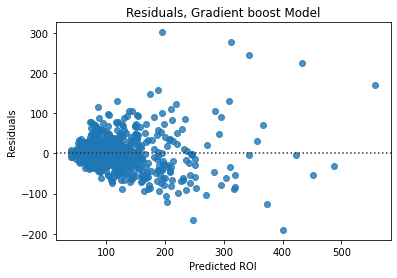

In [68]:
gradient_predictions = boost_2.predict(X_test)

sns.residplot(x = boost_2_predictions, y = y_test - boost_2_predictions)
plt.title('Residuals, Gradient boost Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

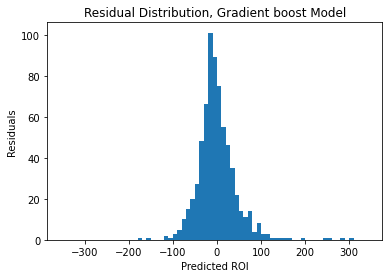

In [69]:
plt.hist(y_test - boost_2_predictions, bins = np.arange(-350, 350, 10))
plt.title('Residual Distribution, Gradient boost Model', size = 12)
plt.ylabel('Residuals', size = 10)
plt.xlabel('Predicted ROI', size = 10)
plt.show()

I divided the result into categories, R square as Test Score, Root mean squared error as RMSE, and Mean Absolute Error as MAE. The model with the best test score result belongs to Linear Regression with 66%. This model has the lowest root mean squared error with 36% and have the slower in MAE. This is the model I selected. 


The Linear Regression has 70% accuracy. The prediction was very close to the test dataset, having a low average prediction error. Meaning the model is suitable for solving real problems. 
